In [1]:
import pandas as pd
import sys

In [2]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [3]:
from huggingface_hub import login

login(token)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sys.path.append('/content/drive/MyDrive')

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_extra_preprocessed.csv")

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test = x_test["text"].reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 352041
Number of data to validate: 44005
Number of labels to train: 352041
Number of labels to validate: 44005


In [8]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [9]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.1 MB/s eta 0:00:00


In [10]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 13.2 MB/s eta 0:00:00


In [11]:
import torch
from datasets import Dataset

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load model directly
from transformers import BertForSequenceClassification, AutoTokenizer ,Trainer, TrainingArguments, EarlyStoppingCallback
camelbert = BertForSequenceClassification.from_pretrained("UBC-NLP/MARBERTv2", num_labels=18)

config.json:   0%|          | 0.00/757 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
camelbert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [17]:
tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERTv2", trust_remote_code=True)

sentences = ["مرحبا نحن عمر و علي و هذا مشروع التخرج الخاص بنا"]

token_ids = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt", return_token_type_ids=False)
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['[CLS]', 'مرحبا', 'نحن', 'عمر', 'و', 'علي', 'و', 'هذا', 'مشروع', 'التخرج', 'الخاص', 'بنا', '[SEP]']


In [18]:
def tokenization(text):
  tokens = tokenizer(text, add_special_tokens=True, padding="max_length", max_length=64, truncation=True, return_tensors="np")

  print(tokens["input_ids"][:2])
  return tokens

In [19]:
x_train_tokenized = tokenization(x_train_text.to_list())
x_val_tokenized = tokenization(x_val_text.to_list())
x_test_tokenized = tokenization(x_test.to_list())

[[    2  2158  2079 62381 35905  2501 71205  4406  1943 33954  6765  4510
   2501  3781  2900  2425 11470  6573 48800     3     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  5377 23438  1997  2326  1947 38922  2884  2698  3153  5338  3029
  21124 12625   112 25281  1933  7580  3158 29576 25668  2330  7761  8045
  51159 44878  2408 96128  1009 25281  1933    21  4402 73253  1009  2001
   2105  2011 40774 19078  1998 23949  2262 71093 34013  2071  8609  3446
   3835 46140  1149  5529 15201 22593  2602  2947  6862  1939 63861 16436
   2303  2835  2408     3]]
[[    2  1962 26508  1011  1945 89717 12844  2372     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0  

In [20]:
train_labels = y_train.to_numpy()
val_labels = y_val.to_numpy()
test_labels = y_test.to_numpy()

In [21]:
# Convert tokenized data into a Dataset object
train_dataset = Dataset.from_dict({**x_train_tokenized, "labels": train_labels})
val_dataset = Dataset.from_dict({**x_val_tokenized, "labels": val_labels})
test_dataset = Dataset.from_dict({**x_test_tokenized, "labels": y_test})

In [22]:
print(train_dataset[0].keys())
print(val_dataset[0].keys())
print(test_dataset[0].keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [23]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

In [24]:
training_args = TrainingArguments(
    output_dir="./camelbert base",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    logging_strategy="steps",
    logging_steps=500,
    report_to="none",  # Prevents `wandb` or other loggers
    gradient_accumulation_steps=2,
    lr_scheduler_type="linear",
    fp16=True,
    warmup_ratio=0.1,  # Warmup for stable early training
    max_grad_norm=1.0,  # Prevents exploding gradients
)

In [25]:
trainer = Trainer(
    model=camelbert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.355000,1.280379,0.601909,0.594973
2,1.109700,1.176242,0.633019,0.628864
3,0.916400,1.182206,0.639927,0.637466
4,0.753900,1.228522,0.641927,0.639529


TrainOutput(global_step=11004, training_loss=1.1298273218107067, metrics={'train_runtime': 4450.9208, 'train_samples_per_second': 395.47, 'train_steps_per_second': 3.089, 'total_flos': 4.631959272313958e+16, 'train_loss': 1.1298273218107067, 'epoch': 4.0})

In [26]:
trainer.save_model("marbertv2")

In [27]:
trainer.evaluate()

{'eval_loss': 1.1762422323226929,
 'eval_accuracy': 0.633018975116464,
 'eval_f1_score': 0.6288635814483725,
 'eval_runtime': 36.7097,
 'eval_samples_per_second': 1198.73,
 'eval_steps_per_second': 9.371,
 'epoch': 4.0}

In [28]:
preds_output = trainer.predict(test_dataset)

In [29]:
logits = np.argmax(preds_output.predictions, axis=1)

**Correct Labels ✅**

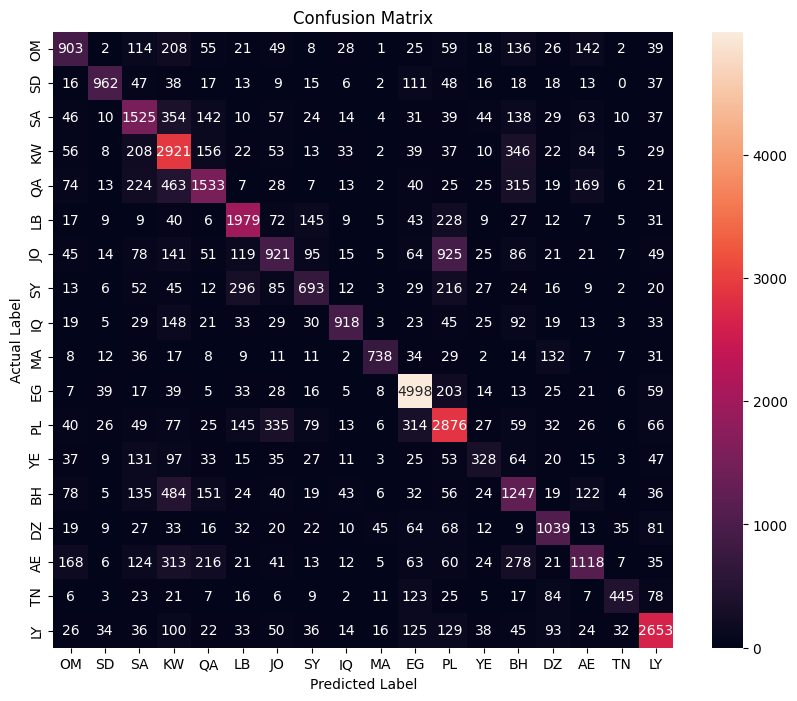

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          OM     0.5722    0.4918    0.5290      1836
          SD     0.8208    0.6941    0.7522      1386
          SA     0.5325    0.5918    0.5606      2577
          KW     0.5274    0.7223    0.6096      4044
          QA     0.6191    0.5137    0.5615      2984
          LB     0.6998    0.7459    0.7221      2653
          JO     0.4928    0.3434    0.4047      2682
          SY     0.5491    0.4442    0.4911      1560
          IQ     0.7914    0.6169    0.6934      1488
          MA     0.8532    0.6661    0.7481      1108
          EG     0.8083    0.9028    0.8530      5536
          PL     0.5616    0.6846    0.6170      4201
          YE     0.4874    0.3442    0.4034       953
          BH     0.4259    0.4939    0.4574      2525
          DZ     0.6308    0.6686    0.6492      1554
          AE     0.5966    0.4428    0.5083      2525
          TN     0.7607    0.5011    0.6042       888
 